In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import datasets, metrics
import matplotlib.pyplot as plt

In [5]:
#Agregamos la fase dataset de boston
boston=datasets.load_boston()

In [7]:
#ponemos la variable data con el Dataframe con las columnas
data=pd.DataFrame(boston.data, columns=boston.feature_names)
data['TARGET']=boston.target

In [8]:
#Abrimos los DAtos
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
data.shape

(506, 14)

In [10]:
# analizamos la variable con la columna y las predicciones con la columna
colum=data.columns.values.tolist()
predict=colum[:13]
target=colum[13]

In [11]:
data["train"]= np.random.uniform(0,1, len(data))<=0.75

In [12]:
train, test = data[data['train']==True],data[data["train"]==False]

In [13]:
# las clasificaciones de las decisiones de el criterio de entropia estan en prediccion
arbol= DecisionTreeClassifier(criterion='entropy',min_samples_split=15,random_state=99)
arbol.fit(train[predict],train[target].astype('int'))

DecisionTreeClassifier(criterion='entropy', min_samples_split=15,
                       random_state=99)

In [14]:
arbol_prediction=arbol.predict(test[predict])

In [15]:
# Abrimos el arbol de los arrays de prediccion
arbol_prediction

array([33, 17, 16, 18, 13, 14, 24, 19, 21, 21, 16, 19, 34, 22, 20, 20, 22,
       22, 31, 23, 17, 23, 19, 19, 19, 15, 19, 19, 17, 15, 13, 19, 15, 17,
       50, 50, 19, 19, 19, 22, 22, 50, 31, 29, 32, 34, 33, 34, 22, 19, 19,
       20, 20, 50, 31, 23, 23, 23, 20, 20, 33, 20, 42, 31, 31, 50, 50, 33,
       42, 20, 33, 16, 23, 31, 26, 21, 23, 21, 25, 21, 19, 19, 29, 20, 21,
       19, 20, 17, 23, 25, 31,  7, 12, 10, 17, 12, 13, 10, 10, 12, 10, 10,
       10, 20, 10, 11, 15, 14, 14, 19, 13, 10, 14, 31, 17, 17, 19, 23])

In [16]:
pd.crosstab(test[target], arbol_prediction, rownames=["pre_Actual"], colnames=["Prediction"])

Prediction,7,10,11,12,13,14,15,16,17,18,...,24,25,26,29,31,32,33,34,42,50
pre_Actual,,,,,,,,,,,,,,,,,,,,,
5.0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6.3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7.2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8.1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
44.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
46.7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [17]:
arbol.score(train[predict],train[target].astype('int'))

0.43041237113402064

In [19]:
#Aqui creamos otro arbol completamente diferente para ver si aumenta el score
arbol2=DecisionTreeClassifier(criterion='gini',min_samples_split=5,random_state=99)

In [20]:
arbol2.fit(train[predict],train[target].astype('int'))

DecisionTreeClassifier(min_samples_split=5, random_state=99)

In [21]:
arbol_prediction2=arbol2.predict(test[predict])

In [22]:
# Abrimos el arbol de prediccion con los datos
arbol_prediction2

array([28, 14, 17, 20, 16, 14, 25, 26, 21, 21, 15, 20, 28, 20, 22, 22, 22,
       22, 28, 15, 18, 27, 15, 16, 18, 18, 16, 21, 13, 15, 13, 19, 15, 18,
       43, 50, 15, 19, 19, 23, 22, 50, 28, 24, 25, 34, 24, 30, 20, 17, 19,
       22, 23, 42, 31, 26, 26, 23, 22, 21, 26, 19, 45, 36, 15, 50, 43, 31,
       50, 20, 34, 19, 23, 28, 27, 17, 27, 18, 23, 21, 29, 20, 30, 22, 18,
       19, 20, 17, 23, 24, 15,  7, 14, 10, 15, 13, 23, 10,  8, 16, 10, 10,
       10, 20,  8, 17, 15, 18, 14, 19, 13, 10, 14, 15, 17, 18, 17, 24])

In [23]:
#HACEMOS la Prediccion de el arbol creado y la actual pre hecha con las columnas en uso
pd.crosstab(test[target], arbol_prediction2, rownames=["pre_Actual"], colnames=["Prediction"])

Prediction,7,8,10,13,14,15,16,17,18,19,...,28,29,30,31,34,36,42,43,45,50
pre_Actual,,,,,,,,,,,,,,,,,,,,,
5.0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.6,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7.2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8.1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
44.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
46.7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [24]:
arbol2.score(train[predict],train[target].astype('int'))

0.7345360824742269

In [25]:
"""Cuando se reduce min_samples_split y se aplica el metodo de gini el score sube, esto se debe a que a traves
del min samples split se selecciona un numero de muestras en el que quiero que se divida un nodo al hacer las
divisiones y con el metodo de Gini se enfoca mas en el numero de veces en el que un dato puede ser elegido incorrectamente.
"""

'Cuando se reduce min_samples_split y se aplica el metodo de gini el score sube, esto se debe a que a traves\ndel min samples split se selecciona un numero de muestras en el que quiero que se divida un nodo al hacer las\ndivisiones y con el metodo de Gini se enfoca mas en el numero de veces en el que un dato puede ser elegido incorrectamente.\n'

In [26]:
validacion_cruzada=KFold(n_splits=5)
validacion_cruzada_print=cross_val_score(arbol2,train[predict],train[target].astype('int'),cv=validacion_cruzada,scoring="accuracy")

In [27]:
validacion_cruzada_print

array([0.08974359, 0.05128205, 0.1025641 , 0.12987013, 0.1038961 ])

In [28]:
score=metrics.accuracy_score(test[target].astype('int'),arbol_prediction2)

In [29]:
score

0.09322033898305085

In [30]:
"""Aqui hemos aplicado una validacion cruzada para evaluar que tanto mejora el modelo y al aplicar validacion cruzada veo 
que el score decae y se debe al sobreajuste de datos debido a los cambios que he realizado.
"""

'Aqui hemos aplicado la validacion cruzada para evaluar que tanto mejora el modelo y al aplicar validacion cruzada veo \nque el score decae y se debe al sobreajuste de datos debido a los cambios que he realizado.\n'

In [31]:
#Importamos el pandas y el matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
data = pd.read_csv("iris.csv")
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [33]:
data.shape

(150, 5)

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

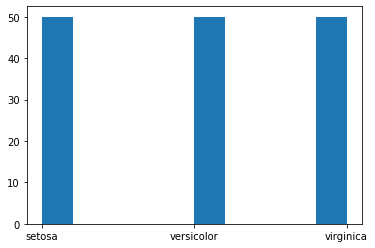

In [34]:
#abrimos los datos de el array y el historial de los mismos datos
plt.hist(data.species)

In [36]:
# abrimos los datos especificos
data.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [37]:
colum=data.columns.values.tolist()

In [39]:
#Agregamos las columnas en la variable de la prediccion y la target
predic=colum[:4]
target=colum[4]

In [40]:
#importamos numpy
import numpy as np

In [41]:
# los datos sera ygual a la variable de random de 0,1 menos o Ygual a 0.75
data["train"]=np.random.uniform(0,1,len(data))<=0.75

In [42]:
# la variable de test pues sera ygual si la data es verdad y lo contrario pues falso
train, test = data[data['train']==True], data[data["train"]==False]

In [48]:
#Importamos la calsificacion de decisiones
from sklearn.tree import DecisionTreeClassifier

In [49]:
tree=DecisionTreeClassifier(criterion="entropy",min_samples_split=20,random_state=99)
tree.fit(train[predic],train[target])

DecisionTreeClassifier(criterion='entropy', min_samples_split=20,
                       random_state=99)

In [50]:
# hacemos la variable de la prediccion de test y prediccion
pred=tree.predict(test[predic])

In [51]:
#Abrimos la prediccion
pred

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'virginica'],
      dtype=object)

In [64]:
from sklearn.tree import export_graphviz

In [69]:
#abrimos el archivo de arbol con la exportacion con el nombre de la prediccion
with open("arbol.dot",'w') as file:
    export_graphviz(tree,out_file=file,feature_names=predic)
    file.close()

In [79]:
#abrimos el arbol.dot de el archivo
filedot=open("arbol.dot","r")
text=filedot.read()
text

'digraph Tree {\nnode [shape=box] ;\n0 [label="petal length (cm) <= 2.6\\nentropy = 1.585\\nsamples = 120\\nvalue = [40, 40, 40]"] ;\n1 [label="entropy = 0.0\\nsamples = 40\\nvalue = [40, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="petal width (cm) <= 1.75\\nentropy = 1.0\\nsamples = 80\\nvalue = [0, 40, 40]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="petal length (cm) <= 5.05\\nentropy = 0.446\\nsamples = 43\\nvalue = [0, 39, 4]"] ;\n2 -> 3 ;\n4 [label="sepal length (cm) <= 4.95\\nentropy = 0.172\\nsamples = 39\\nvalue = [0, 38, 1]"] ;\n3 -> 4 ;\n5 [label="entropy = 1.0\\nsamples = 2\\nvalue = [0, 1, 1]"] ;\n4 -> 5 ;\n6 [label="entropy = 0.0\\nsamples = 37\\nvalue = [0, 37, 0]"] ;\n4 -> 6 ;\n7 [label="entropy = 0.811\\nsamples = 4\\nvalue = [0, 1, 3]"] ;\n3 -> 7 ;\n8 [label="petal length (cm) <= 4.85\\nentropy = 0.179\\nsamples = 37\\nvalue = [0, 1, 36]"] ;\n2 -> 8 ;\n9 [label="entropy = 1.0\\nsamples = 2\\nva